In [8]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from numpy.polynomial import Polynomial

In [14]:
from numpy.typing import NDArray

class NewtonFractal : 

    def __init__(self, roots: NDArray[np.complexfloating]) :
        self.max_iter = 1e5
        self.dx = 1e-16
        self.tolerance = 1e-16
        self.roots = roots

        self.poly = Polynomial.fromroots(self.roots)
        self.dpoly = self.poly.deriv()
    
    def perform_newton(self, x0) : 
        not_converged = True
        iters = 0
        curr_x = x0
        closest = None
        
        while not_converged and iters < self.max_iter : 
            new_x = curr_x - self.poly(curr_x)/self.dpoly(curr_x)
            
            curr_x = new_x
            iters += 1

            # Convergence test
            if np.isclose(new_x, self.roots, rtol=self.tolerance).any() : 
                root_proximity = np.abs(curr_x - self.roots)
                closest = np.argmin(root_proximity)
                not_converged = False
            
        return curr_x, iters, closest
            
    

(2.000000000000006+0.9999999999999977j)
1


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


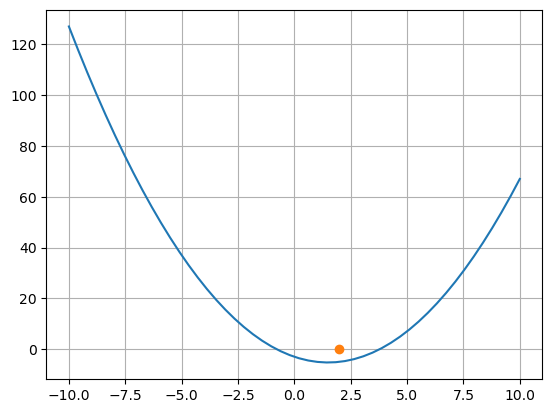

In [15]:
test = NewtonFractal(roots=np.array([1.0+5.0j, 2.0+1.0j]))

xs = np.linspace(-10, 10)
ys = test.poly(xs)

plt.plot(xs, ys)

root_x, iters, closest = test.perform_newton(-1.0)

print(root_x)
print(closest)

plt.plot(root_x, test.poly(root_x).real, 'o')
plt.grid()

In [21]:
reals = np.linspace(-1, 1, 500)
imags = np.linspace(-1, 1, 500)

X, Y = np.meshgrid(reals, imags)

Z = X + 1j * Y

closest = []

roots = np.array([
    1,
    np.exp(2j * np.pi / 3),
    np.exp(4j * np.pi / 3),
    np.exp(6j * np.pi / 3)
])


computer = NewtonFractal(roots=roots)

for z in tqdm(Z.flatten()) : 
    curr_x, iters, root = computer.perform_newton(z)
    closest.append(root)

100%|██████████| 250000/250000 [01:37<00:00, 2556.05it/s]


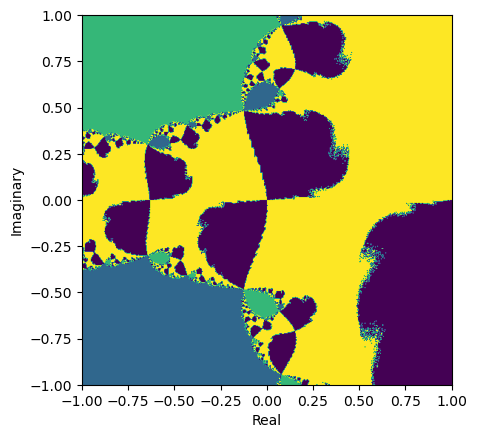

In [22]:
import numpy as np
import matplotlib.pyplot as plt

closest = np.array(closest)
closest_2d = closest.reshape(Z.shape)  # reshape back to 2D grid

plt.imshow(closest_2d, extent=(-1,1,-1,1), cmap='viridis')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()
